### 딥러닝 CNN 프로젝트

#### Vehicle 분류
- 미세 조정

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/vehicles/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 22852 images belonging to 17 classes.
{'Ambulance': 0, 'Barge': 1, 'Bicycle': 2, 'Boat': 3, 'Bus': 4, 'Car': 5, 'Cart': 6, 'Caterpillar': 7, 'Helicopter': 8, 'Limousine': 9, 'Motorcycle': 10, 'Segway': 11, 'Snowmobile': 12, 'Tank': 13, 'Taxi': 14, 'Truck': 15, 'Van': 16}


In [2]:
target_name = {v : k for k, v in generator.class_indices.items()}
print(target_name)

{0: 'Ambulance', 1: 'Barge', 2: 'Bicycle', 3: 'Boat', 4: 'Bus', 5: 'Car', 6: 'Cart', 7: 'Caterpillar', 8: 'Helicopter', 9: 'Limousine', 10: 'Motorcycle', 11: 'Segway', 12: 'Snowmobile', 13: 'Tank', 14: 'Taxi', 15: 'Truck', 16: 'Van'}


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


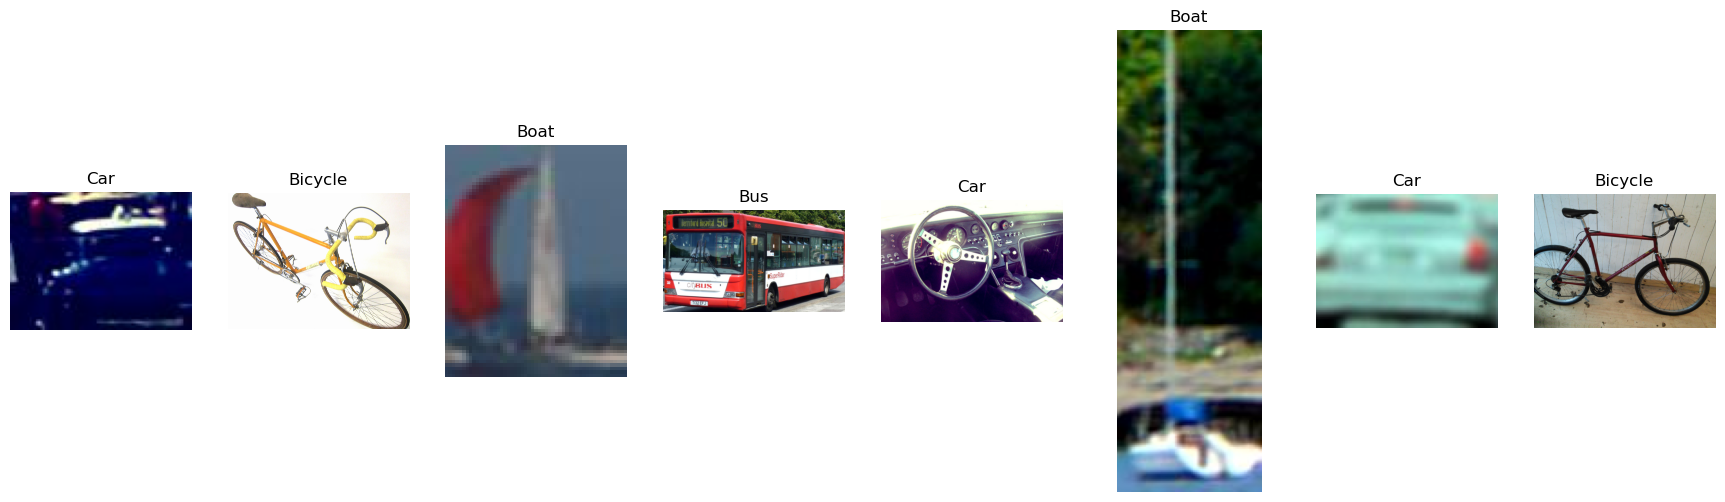

In [4]:
show_images(generator)

#### 데이터 프레임 형태로 만들어서 파일 분리합니다.

In [5]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])


In [6]:
from glob import glob
import os

root = './datasets/vehicles/original/'

directories = glob(os.path.join(root, '*'))
print(directories)
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['./datasets/vehicles/original\\Ambulance', './datasets/vehicles/original\\Barge', './datasets/vehicles/original\\Bicycle', './datasets/vehicles/original\\Boat', './datasets/vehicles/original\\Bus', './datasets/vehicles/original\\Car', './datasets/vehicles/original\\Cart', './datasets/vehicles/original\\Caterpillar', './datasets/vehicles/original\\Helicopter', './datasets/vehicles/original\\Limousine', './datasets/vehicles/original\\Motorcycle', './datasets/vehicles/original\\Segway', './datasets/vehicles/original\\Snowmobile', './datasets/vehicles/original\\Tank', './datasets/vehicles/original\\Taxi', './datasets/vehicles/original\\Truck', './datasets/vehicles/original\\Van']
['Ambulance', 'Barge', 'Bicycle', 'Boat', 'Bus', 'Car', 'Cart', 'Caterpillar', 'Helicopter', 'Limousine', 'Motorcycle', 'Segway', 'Snowmobile', 'Tank', 'Taxi', 'Truck', 'Van']


In [7]:
root = './datasets/vehicles/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.jpg')

        os.rename(old_file, new_file)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/vehicles/original/Ambulance/Ambulance10.jpg' -> './datasets/vehicles/original/Ambulance/Ambulance2.jpg'

In [ ]:
root = './datasets/vehicles/test/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.jpg')

        os.rename(old_file, new_file)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/vehicles/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

In [9]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Ambulance',
 1: 'Barge',
 2: 'Bicycle',
 3: 'Boat',
 4: 'Bus',
 5: 'Car',
 6: 'Cart',
 7: 'Caterpillar',
 8: 'Helicopter',
 9: 'Limousine',
 10: 'Motorcycle',
 11: 'Segway',
 12: 'Snowmobile',
 13: 'Tank',
 14: 'Taxi',
 15: 'Truck',
 16: 'Van'}

In [10]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [11]:
import pandas as pd

v_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
v_df.file_paths = v_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
v_df

file_paths target_names  targets
0      ./datasets/vehicles/original/Ambulance/Ambulan...    Ambulance        0
1      ./datasets/vehicles/original/Ambulance/Ambulan...    Ambulance        0
2      ./datasets/vehicles/original/Ambulance/Ambulan...    Ambulance        0
3      ./datasets/vehicles/original/Ambulance/Ambulan...    Ambulance        0
4      ./datasets/vehicles/original/Ambulance/Ambulan...    Ambulance        0
...                                                  ...          ...      ...
22847         ./datasets/vehicles/original/Van/Van95.jpg          Van       16
22848         ./datasets/vehicles/original/Van/Van96.jpg          Van       16
22849         ./datasets/vehicles/original/Van/Van97.jpg          Van       16
22850         ./datasets/vehicles/original/Van/Van98.jpg          Van       16
22851         ./datasets/vehicles/original/Van/Van99.jpg          Van       16

[22852 rows x 3 columns]

In [12]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(v_df.file_paths, 
                 v_df.targets, 
                 stratify=v_df.targets, 
                 test_size=0.2, random_state=124)

print(validation_targets.value_counts())
print(train_targets.value_counts())

targets
3     1582
5     1078
10     438
4      357
2      299
15     295
16     143
14     106
8      103
7       57
1       32
13      24
11      18
0       18
12      15
6        4
9        2
Name: count, dtype: int64
targets
3     6327
5     4312
10    1751
4     1425
2     1197
15    1179
16     572
14     421
8      414
7      229
1      128
13      97
11      70
0       70
12      62
6       18
9        9
Name: count, dtype: int64


In [13]:
import shutil

root = './datasets/vehicles/'

for file_path in train_images:
    print(file_path[len(root+ 'original/'): file_path.rindex('/')])
    vehicle_dir = file_path[len(root+ 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + vehicle_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

Boat
Boat
Motorcycle
Car
Motorcycle
Motorcycle
Car
Boat
Tank
Truck
Bus
Bus
Boat
Car
Boat
Boat
Boat
Barge
Car
Bus
Boat
Boat
Bus
Bus
Car
Bicycle
Helicopter
Bus
Tank
Bus
Helicopter
Taxi
Car
Boat
Car
Van
Car
Boat
Boat
Bicycle
Boat
Car
Car
Bicycle
Bus
Helicopter
Boat
Boat
Car
Boat
Bicycle
Car
Segway
Boat
Boat
Bicycle
Car
Boat
Car
Truck
Motorcycle
Boat
Boat
Boat
Car
Boat
Taxi
Truck
Boat
Barge
Car
Boat
Bus
Car
Boat
Van
Car
Motorcycle
Boat
Bicycle
Boat
Boat
Bus
Boat
Boat
Boat
Bicycle
Boat
Bus
Boat
Boat
Boat
Boat
Boat
Car
Boat
Boat
Boat
Motorcycle
Boat
Car
Boat
Boat
Boat
Car
Boat
Motorcycle
Boat
Boat
Bus
Car
Taxi
Car
Boat
Bus
Boat
Truck
Bus
Boat
Motorcycle
Bus
Car
Motorcycle
Boat
Boat
Motorcycle
Car
Boat
Car
Motorcycle
Bicycle
Truck
Car
Boat
Bicycle
Boat
Boat
Boat
Car
Boat
Boat
Car
Car
Truck
Car
Truck
Car
Truck
Car
Boat
Motorcycle
Boat
Car
Car
Van
Boat
Bicycle
Boat
Bus
Bicycle
Motorcycle
Boat
Boat
Boat
Boat
Helicopter
Boat
Van
Car
Motorcycle
Boat
Boat
Car
Bus
Truck
Boat
Boat
Ambulance
Boat
Car


In [14]:
import shutil

root = './datasets/vehicles/'

for file_path in validation_images:
    print(file_path[len(root+ 'original/'): file_path.rindex('/')])
    vehicle_dir = file_path[len(root+ 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + vehicle_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

Taxi
Boat
Barge
Motorcycle
Car
Boat
Boat
Car
Bus
Boat
Bus
Bus
Bus
Motorcycle
Truck
Car
Boat
Boat
Boat
Bicycle
Bus
Truck
Boat
Bus
Bicycle
Boat
Boat
Truck
Boat
Truck
Truck
Bicycle
Boat
Boat
Van
Boat
Truck
Boat
Truck
Boat
Bicycle
Car
Bicycle
Van
Car
Boat
Motorcycle
Boat
Bus
Boat
Boat
Van
Truck
Car
Motorcycle
Bus
Boat
Boat
Car
Car
Boat
Truck
Car
Car
Car
Motorcycle
Truck
Car
Truck
Taxi
Boat
Boat
Car
Bus
Bicycle
Van
Truck
Truck
Helicopter
Car
Boat
Tank
Boat
Van
Boat
Boat
Bus
Taxi
Boat
Car
Boat
Truck
Car
Van
Car
Boat
Car
Car
Helicopter
Boat
Bicycle
Car
Car
Motorcycle
Taxi
Bicycle
Car
Boat
Boat
Boat
Car
Bus
Boat
Bicycle
Truck
Bicycle
Car
Car
Van
Car
Bus
Boat
Car
Boat
Bus
Boat
Car
Boat
Car
Boat
Motorcycle
Car
Boat
Car
Truck
Car
Helicopter
Car
Bus
Car
Boat
Boat
Car
Motorcycle
Motorcycle
Boat
Truck
Car
Boat
Taxi
Boat
Boat
Motorcycle
Truck
Motorcycle
Boat
Helicopter
Car
Truck
Bus
Bicycle
Bus
Truck
Car
Boat
Car
Car
Bus
Motorcycle
Boat
Truck
Boat
Car
Helicopter
Bicycle
Caterpillar
Bus
Bicycle
Boat
B

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/vehicles/test/'

test_idg = ImageDataGenerator(rescale=1./255)

test_generator = test_idg.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(test_generator.class_indices)

Found 5193 images belonging to 17 classes.
{'Ambulance': 0, 'Barge': 1, 'Bicycle': 2, 'Boat': 3, 'Bus': 4, 'Car': 5, 'Cart': 6, 'Caterpillar': 7, 'Helicopter': 8, 'Limousine': 9, 'Motorcycle': 10, 'Segway': 11, 'Snowmobile': 12, 'Tank': 13, 'Taxi': 14, 'Truck': 15, 'Van': 16}


In [16]:
target_name = {v: k for k, v in test_generator.class_indices.items()}
target_name

{0: 'Ambulance',
 1: 'Barge',
 2: 'Bicycle',
 3: 'Boat',
 4: 'Bus',
 5: 'Car',
 6: 'Cart',
 7: 'Caterpillar',
 8: 'Helicopter',
 9: 'Limousine',
 10: 'Motorcycle',
 11: 'Segway',
 12: 'Snowmobile',
 13: 'Tank',
 14: 'Taxi',
 15: 'Truck',
 16: 'Van'}

In [17]:
target_names = []
for target in test_generator.classes:
    target_names.append(target_name[target])

In [18]:
import pandas as pd

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
test_df

file_paths target_names  targets
0     ./datasets/vehicles/test/Ambulance/Ambulance1.jpg    Ambulance        0
1     ./datasets/vehicles/test/Ambulance/Ambulance10...    Ambulance        0
2     ./datasets/vehicles/test/Ambulance/Ambulance11...    Ambulance        0
3     ./datasets/vehicles/test/Ambulance/Ambulance12...    Ambulance        0
4     ./datasets/vehicles/test/Ambulance/Ambulance13...    Ambulance        0
...                                                 ...          ...      ...
5188             ./datasets/vehicles/test/Van/Van95.jpg          Van       16
5189             ./datasets/vehicles/test/Van/Van96.jpg          Van       16
5190             ./datasets/vehicles/test/Van/Van97.jpg          Van       16
5191             ./datasets/vehicles/test/Van/Van98.jpg          Van       16
5192             ./datasets/vehicles/test/Van/Van99.jpg          Van       16

[5193 rows x 3 columns]

In [19]:
test_images, test_targets = test_df.file_paths, test_df.targets

In [20]:
print(validation_targets.value_counts())
print(train_targets.value_counts())
print(test_targets.value_counts())

targets
3     1582
5     1078
10     438
4      357
2      299
15     295
16     143
14     106
8      103
7       57
1       32
13      24
11      18
0       18
12      15
6        4
9        2
Name: count, dtype: int64
targets
3     6327
5     4312
10    1751
4     1425
2     1197
15    1179
16     572
14     421
8      414
7      229
1      128
13      97
11      70
0       70
12      62
6       18
9        9
Name: count, dtype: int64
targets
5     1391
10     797
3      786
15     559
16     396
4      351
14     221
8      151
2      122
13      85
11      65
9       63
12      46
7       45
0       44
1       42
6       29
Name: count, dtype: int64


In [21]:
train_df = v_df.iloc[train_images.index].reset_index(drop=True)
validation_df = v_df.iloc[validation_images.index].reset_index(drop=True)

In [22]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(18281, 3)
(4571, 3)
(5193, 3)


### 사용할 사전 모델
- 미세 조정 (fine_tuning) 이전, fit하고 점수를 먼저 확인합니다.
- 사용할 사전 모델은 다음과 같습니다.
> 1. VGG16
> 2. Efficience
> 3. Xception


### Cycle 1
- VGG16

In [23]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 150
BATCH_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=vgg_preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=vgg_preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=vgg_preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 18281 validated image filenames belonging to 17 classes.
Found 4571 validated image filenames belonging to 17 classes.
Found 5193 validated image filenames belonging to 17 classes.
{'Ambulance': 0, 'Barge': 1, 'Bicycle': 2, 'Boat': 3, 'Bus': 4, 'Car': 5, 'Cart': 6, 'Caterpillar': 7, 'Helicopter': 8, 'Limousine': 9, 'Motorcycle': 10, 'Segway': 11, 'Snowmobile': 12, 'Tank': 13, 'Taxi': 14, 'Truck': 15, 'Van': 16}
{'Ambulance': 0, 'Barge': 1, 'Bicycle': 2, 'Boat': 3, 'Bus': 4, 'Car': 5, 'Cart': 6, 'Caterpillar': 7, 'Helicopter': 8, 'Limousine': 9, 'Motorcycle': 10, 'Segway': 11, 'Snowmobile': 12, 'Tank': 13, 'Taxi': 14, 'Truck': 15, 'Van': 16}
{'Ambulance': 0, 'Barge': 1, 'Bicycle': 2, 'Boat': 3, 'Bus': 4, 'Car': 5, 'Cart': 6, 'Caterpillar': 7, 'Helicopter': 8, 'Limousine': 9, 'Motorcycle': 10, 'Segway': 11, 'Snowmobile': 12, 'Tank': 13, 'Taxi': 14, 'Truck': 15, 'Van': 16}


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2, EfficientNetV2B0


def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet':
        model = EfficientNetV2B0(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(17, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

vgg = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
vgg.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         153,9

 Total params: 14,873,705 (56.74 MB)

 Trainable params: 14,873,705 (56.74 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/PJ4/vgg/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=8,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=8,
    mode='min'
)

In [37]:
import gc
gc.collect()

301

In [38]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

vgg = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
vgg.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         153,9

 Total params: 14,873,705 (56.74 MB)

 Trainable params: 14,873,705 (56.74 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
N_EPOCHS = 20

vgg_history = vgg.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 787s 3s/step - acc: 0.3204 - loss: 4.0341 - val_acc: 0.3881 - val_loss: 1.7714 - learning_rate: 0.0010
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 794s 3s/step - acc: 0.4195 - loss: 1.7283 - val_acc: 0.4592 - val_loss: 1.5599 - learning_rate: 0.0010
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 791s 3s/step - acc: 0.5037 - loss: 1.4994 - val_acc: 0.5723 - val_loss: 1.3152 - learning_rate: 0.0010
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 789s 3s/step - acc: 0.5790 - loss: 1.3228 - val_acc: 0.6099 - val_loss: 1.1751 - learning_rate: 0.0010
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 789s 3s/step - acc: 0.6336 - loss: 1.1413 - val_acc: 0.6517 - val_loss: 1.0761 - learning_rate: 0.0010
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 790s 3s/step - acc: 0.6829 - loss: 0.9882 - val_acc: 0.6911 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 791s 3s/step - acc: 0.7131 - loss: 0.8918 - val_acc: 0.7125 - val_loss: 0.9142 - learning_rate: 0.0010

In [41]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6,6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()



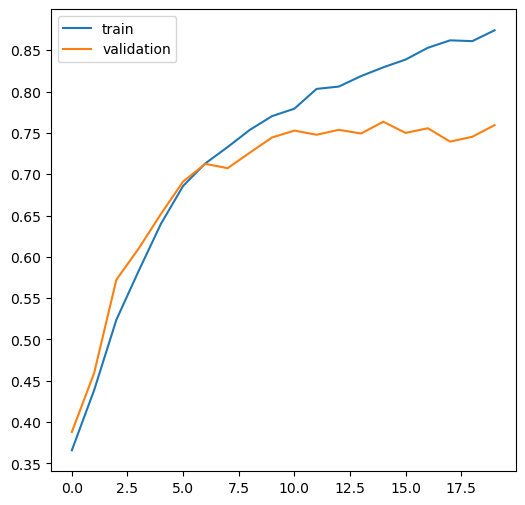

In [42]:
show_history(vgg_history)

val_loss값이 가장 낮을 때의 Epoch로 평가를 진행합니다.

In [45]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

vgg = create_model(model_name='vgg16', verbose=False)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
vgg.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
vgg.load_weights("./callback_files/PJ4/vgg/weights.014-0.7942-0.8188.weights.h5")

In [46]:
vgg.evaluate(test_flow)

82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.6617 - loss: 1.1564


[1.1541141271591187, 0.6632004380226135]

예측 수행

In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMAGE_SIZE = 224

def get_prediction_from_generator(image, model, image_size=(IMAGE_SIZE, IMAGE_SIZE)):
    print(image.shape)
    image = cv2.resize(image, image_size)
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # print(prediction)
    # print(target_name)
    for i, prediction in enumerate(prediction):
        print(i, prediction)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = target_name[predicted_class_index]
    
    return predicted_class_label

def predict_images(flow, model, image_size=IMAGE_SIZE, ncols=8):
    random_indices = np.random.choice(len(flow.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in flow.class_indices.items()}
    target_names = []
    
    for target in flow.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []
    predicts=[]
    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(flow.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
        prediction = get_prediction_from_generator(image, model)
        predicts.append(prediction)
        
    fig, axes = plt.subplots(figsize=(22, 8), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        # print(i, index)
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(f'Answer : {target_names[index]} \n Predict : {predicts[i]}')
        


(220, 109, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
0 [3.27868156e-06 1.49179781e-02 4.89575788e-03 8.55064511e-01
 4.51158965e-04 1.10775225e-01 5.55990446e-05 6.94281596e-04
 7.01328623e-04 4.64613004e-05 3.96942860e-03 8.50518918e-05
 4.40774078e-04 1.45743147e-03 2.14745174e-03 3.83171393e-03
 4.62567346e-04]
(851, 854, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0 [4.4953972e-06 2.9442592e-03 3.6937669e-03 9.2856288e-01 3.8981257e-04
 1.3624774e-02 1.2062227e-06 1.2159721e-03 4.3653492e-02 7.5887101e-07
 2.2427214e-04 1.4793197e-05 6.1124134e-05 5.8622903e-04 9.5610577e-04
 3.6064016e-03 4.5968065e-04]
(258, 284, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0 [6.04796000e-08 1.17342046e-04 8.02902520e-01 9.49890818e-03
 8.37122716e-05 8.86483642e-04 1.65927061e-03 1.06102098e-02
 4.41820186e-04 1.16400031e-06 1.72972858e-01 3.29950388e-04
 3.14191362e-04 2.16844946e-05 9.48328379e-05 6.35060933e-05
 1.54728798e-06]
(301, 147, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0 [2.7238164e-05 1.46

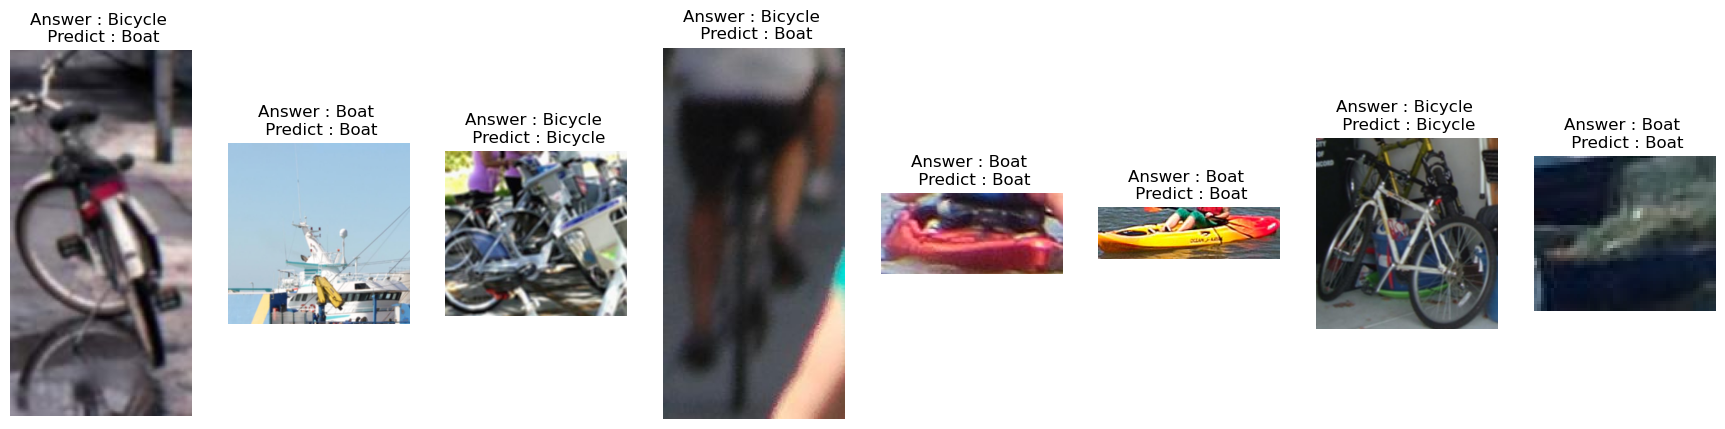

In [50]:
predict_images(test_flow, vgg)

train과 validation & test 점수의 차이가 나는 것을 보아, 과적합의 위험이 있다고 판단이 되어, Albumentation을 적용합니다.

### Cycle 2
- albumentation 적용

In [57]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        self.preprocess = preprocess
        
        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                
            results_batch[i] = image

        return results_batch, targets_batch

    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [58]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as efficient_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=vgg_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg_preprocess_input)

In [59]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

vgg_aug = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
vgg_aug.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │         153,9

 Total params: 14,873,705 (56.74 MB)

 Trainable params: 14,873,705 (56.74 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/PJ4/vgg_aug/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [61]:
gc.collect()

76712

In [62]:
N_EPOCHS = 20

vgg_aug_history = vgg_aug.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 1902s 7s/step - acc: 0.3105 - loss: 8.0530 - val_acc: 0.3973 - val_loss: 1.7993 - learning_rate: 0.0010
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1869s 7s/step - acc: 0.3961 - loss: 1.7798 - val_acc: 0.3955 - val_loss: 1.7432 - learning_rate: 0.0010
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1825s 6s/step - acc: 0.4211 - loss: 1.7191 - val_acc: 0.4421 - val_loss: 1.6289 - learning_rate: 0.0010
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1885s 7s/step - acc: 0.4641 - loss: 1.5993 - val_acc: 0.5189 - val_loss: 1.4573 - learning_rate: 0.0010
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2154s 8s/step - acc: 0.4966 - loss: 1.5301 - val_acc: 0.5404 - val_loss: 1.3927 - learning_rate: 0.0010
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1948s 7s/step - acc: 0.5196 - loss: 1.4531 - val_acc: 0.5609 - val_loss: 1.3273 - learning_rate: 0.0010
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1938s 7s/step - acc: 0.5403 - loss: 1.3837 - val_acc: 0.5819 - val_loss: 1.2748 - learning_rate: 0.0010
Epo

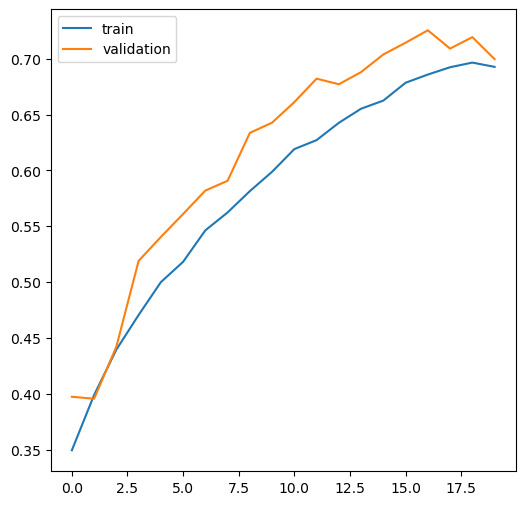

In [63]:
show_history(vgg_aug_history)

In [64]:
vgg_aug.evaluate(test_dataset)

82/82 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - acc: 0.6858 - loss: 1.0923


[1.3913148641586304, 0.5963797569274902]

(628, 768, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
0 [2.3167056e-05 1.0130497e-03 2.6565472e-02 8.6576164e-02 2.3179200e-04
 4.3568429e-01 1.0314874e-03 4.6467250e-03 2.1214348e-03 2.6764101e-04
 3.4382963e-01 3.1894771e-03 4.1311018e-02 1.1859479e-02 1.1324381e-03
 3.9439593e-02 1.0771567e-03]
(2700, 3611, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
0 [1.4654519e-03 1.5131569e-04 1.5466711e-04 4.0774471e-03 2.2088753e-03
 3.0089718e-01 2.0479807e-04 7.4639897e-06 4.8842514e-04 1.2865894e-03
 1.0520422e-03 1.5825749e-04 1.9236066e-03 4.1220048e-03 1.4342699e-03
 6.6629058e-01 1.4076984e-02]
(267, 662, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
0 [2.4980509e-13 5.2372657e-15 2.4219009e-09 3.0781006e-08 6.8363648e-11
 9.9998426e-01 2.1504942e-10 1.4593187e-18 1.0589662e-14 1.1312819e-08
 4.7407940e-09 3.8833408e-09 1.8939110e-09 1.1800284e-15 1.7812666e-09
 1.4892837e-05 8.2996200e-07]
(502, 681, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
0 [1.6127202e-04 1.1179298e-03 1.1968112e-02 2.0373066e

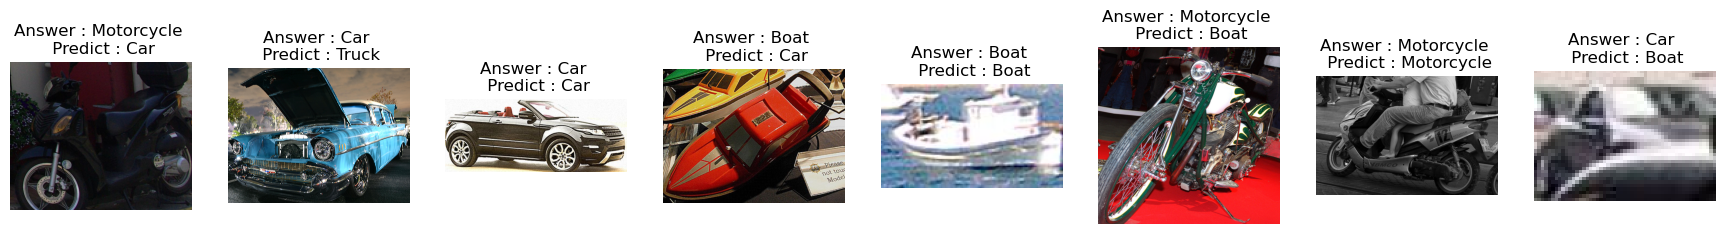

In [72]:
predict_images(test_flow, vgg_aug)

### Cycle 3
- EfficienceNet 사용

In [73]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as efficient_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=efficient_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=efficient_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=efficient_preprocess_input)

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2, EfficientNetV2B0


def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet':
        model = EfficientNetV2B0(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(17, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [75]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

efficient_model = create_model(model_name='efficientnet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
efficient_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               0 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 56, 56, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 56, 56, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 56, 56, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 56, 56, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2b_expand_conv (Conv2D)  │ (None, 56, 56, 128)       │          36,86

 Total params: 6,308,729 (24.07 MB)

 Trainable params: 6,248,121 (23.83 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [76]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/PJ4/efficient/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [77]:
gc.collect()

56927

In [78]:
N_EPOCHS = 20

efficient_model_history = efficient_model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - acc: 0.6555 - loss: 1.1660 - val_acc: 0.8738 - val_loss: 0.4018 - learning_rate: 0.0010
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - acc: 0.8279 - loss: 0.5793 - val_acc: 0.8771 - val_loss: 0.3820 - learning_rate: 0.0010
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - acc: 0.8509 - loss: 0.4860 - val_acc: 0.8952 - val_loss: 0.3186 - learning_rate: 0.0010
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - acc: 0.8678 - loss: 0.4315 - val_acc: 0.9018 - val_loss: 0.3065 - learning_rate: 0.0010
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - acc: 0.8699 - loss: 0.4157 - val_acc: 0.9066 - val_loss: 0.3015 - learning_rate: 0.0010
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - acc: 0.8786 - loss: 0.3824 - val_acc: 0.8994 - val_loss: 0.3176 - learning_rate: 0.0010
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - acc: 0.8879 - loss: 0.3586 - val_acc: 0.8878 - val_loss: 0.3444 - learning_rate: 0.0010

val_loss가 가장 적은 14번째 epoch를 가지고 모델을 평가하고 예측을 수행합니다.

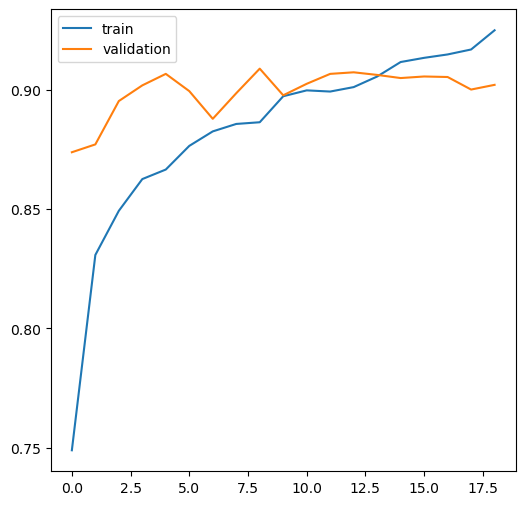

In [79]:
show_history(efficient_model_history)

In [80]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

efficient_model = create_model(model_name='efficientnet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
efficient_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
efficient_model.load_weights('./callback_files/PJ4/efficient/weights.014-0.2920-0.9055.weights.h5')

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               0 │ rescaling_1[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 56, 56, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 56, 56, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 56, 56, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 56, 56, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 6,308,729 (24.07 MB)

 Trainable params: 6,248,121 (23.83 MB)

 Non-trainable params: 60,608 (236.75 KB)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 492 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [81]:
efficient_model.evaluate(test_dataset)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - acc: 0.8697 - loss: 0.4898


[0.5878626704216003, 0.8471018671989441]

(529, 1444, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0 [2.0855796e-04 2.4987230e-07 6.0273328e-07 4.6450064e-06 3.3919158e-04
 9.8992258e-02 1.9341635e-06 9.9836370e-08 1.1753737e-06 6.3746166e-04
 4.3499435e-06 2.6677408e-06 4.6380780e-08 3.2311668e-06 1.6826628e-04
 8.7283504e-01 2.6800247e-02]
(267, 360, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0 [6.74131881e-15 1.13711739e-03 3.59883012e-10 9.98862863e-01
 2.67492806e-10 4.88750374e-09 8.33403713e-13 1.27965763e-11
 2.45692555e-09 1.00559846e-13 1.27305610e-10 6.83091984e-13
 9.81802313e-13 2.71879436e-10 6.87456828e-11 6.79213885e-09
 1.11233531e-11]
(66, 124, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0 [2.96952418e-09 1.09258957e-09 4.29739000e-09 4.29068041e-06
 2.43251925e-05 9.15917575e-01 4.09443901e-09 3.62598146e-11
 2.37595255e-09 4.36603614e-06 2.89775617e-08 8.18161927e-10
 9.41809408e-11 1.16183205e-08 2.02852698e-05 8.36389288e-02
 3.90110567e-04]
(2464, 3802, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0 [1.7497324e-10 1.63

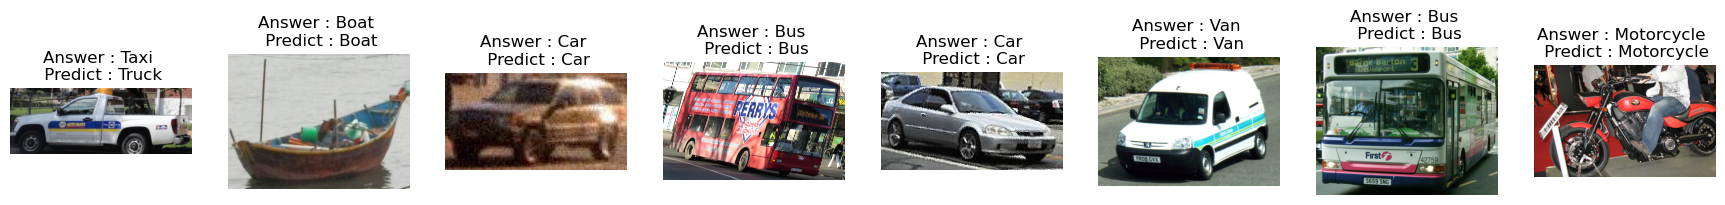

In [82]:
predict_images(test_flow, efficient_model)

### Cycle 4
- DenseNet으로 예측 수행

In [83]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as efficient_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as dense_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=dense_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=dense_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=dense_preprocess_input)

In [84]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2, EfficientNetV2B0, DenseNet201


def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet':
        model = EfficientNetV2B0(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'densenet':
        model = DenseNet201(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(17, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [85]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

densenet_model = create_model(model_name='densenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
densenet_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer_12[0][0]       │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 18,903,401 (72.11 MB)

 Trainable params: 18,674,345 (71.24 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [86]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/PJ4/densenet/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [87]:
gc.collect()

27159

In [88]:
N_EPOCHS = 20

densenet_model_history = densenet_model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 2148s 7s/step - acc: 0.5529 - loss: 1.5880 - val_acc: 0.5531 - val_loss: 8.7498 - learning_rate: 0.0010
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2133s 7s/step - acc: 0.7115 - loss: 0.9820 - val_acc: 0.6690 - val_loss: 1.3149 - learning_rate: 0.0010
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2136s 7s/step - acc: 0.7540 - loss: 0.8308 - val_acc: 0.7736 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2137s 7s/step - acc: 0.7779 - loss: 0.7479 - val_acc: 0.7265 - val_loss: 0.9277 - learning_rate: 0.0010
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2142s 7s/step - acc: 0.7911 - loss: 0.6906 - val_acc: 0.7633 - val_loss: 1.0312 - learning_rate: 0.0010
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2144s 7s/step - acc: 0.7907 - loss: 0.6856 - val_acc: 0.7884 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2153s 8s/step - acc: 0.8077 - loss: 0.6363 - val_acc: 0.8180 - val_loss: 0.5993 - learning_rate: 0.0010
Epo

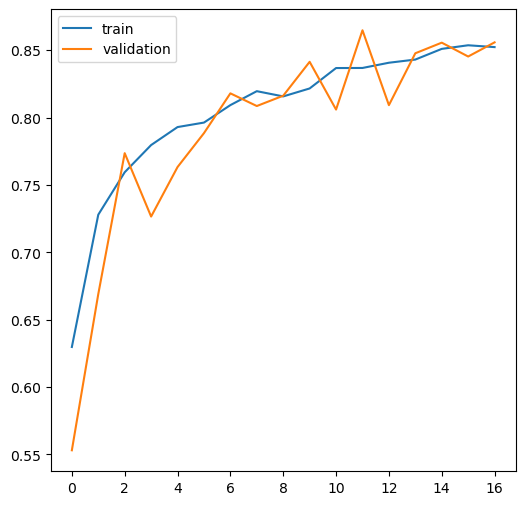

In [89]:
show_history(densenet_model_history)

In [91]:
densenet_model.evaluate(test_dataset)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - acc: 0.8133 - loss: 0.6821


[0.8680742383003235, 0.7714230418205261]

(1706, 2216, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
0 [1.3914493e-18 1.8668707e-20 1.6612695e-15 1.7551516e-12 8.6106701e-15
 5.3141098e-02 1.1947013e-24 6.1352087e-29 7.7790391e-21 2.2139574e-18
 6.8460619e-12 1.8144749e-24 3.2695978e-17 4.0491998e-24 9.4685888e-01
 6.9693079e-10 4.8235527e-09]
(1550, 2087, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
0 [5.4425858e-05 1.5689149e-19 3.5900971e-15 2.1640974e-15 1.4011682e-09
 2.2571418e-02 8.7659671e-20 6.2607635e-28 1.3798455e-16 3.5058480e-12
 7.4015583e-10 1.9069225e-19 2.1534388e-17 7.4647921e-21 9.5703918e-01
 7.0355795e-06 2.0327987e-02]
(1773, 3266, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
0 [1.0935806e-19 4.3344880e-22 6.8758809e-18 9.3148068e-17 7.1141490e-17
 9.9999309e-01 1.6097119e-24 7.7895256e-32 9.8805943e-25 1.9973120e-14
 1.0365137e-11 5.0774125e-24 1.2817177e-21 3.9423527e-22 6.4123410e-06
 4.2290947e-07 5.4484008e-09]
(1845, 2420, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
0 [6.5734252e-23 1.6169613e-26 2.9640919e-18 2

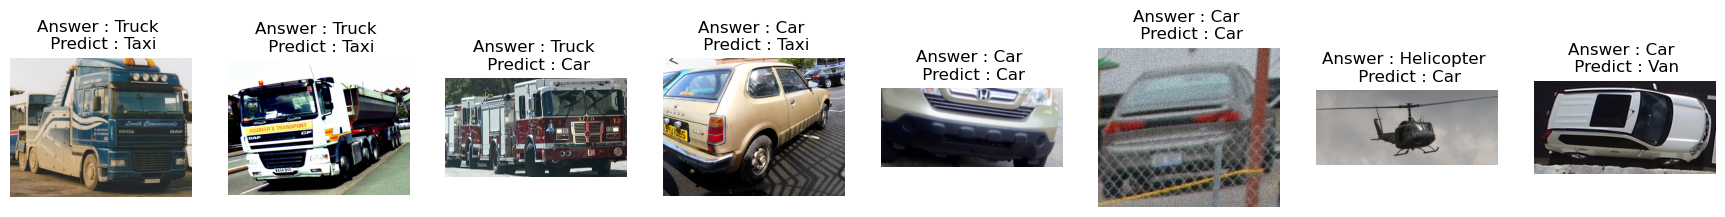

In [94]:
predict_images(test_flow, densenet_model)

---
### 중간 정리
- 가장 점수가 잘 나온 EfficienceNet을 기준으로 FineTuning을 진행합니다.

1. Cycle 1 VGG
> acc: 0.8209 - loss: 0.5426  
> val_acc: 0.7493 - val_loss: 0.7942   
> test_acc: 0.6617 test_loss : 1.1564  

2. Cycle 2 VGG + albumentation
> acc: 0.6902 - loss: 0.9755  
> val_acc: 0.6996 - val_loss: 0.9569   
> test acc: 0.6858 - test loss: 1.0923  

3. Cycle 3 EfficienceNet + albumentation
> acc: 0.9108 - loss: 0.2728   
> val_acc: 0.9061 - val_loss: 0.2920  
> test acc: 0.8697 - test loss: 0.4898  

4. Cycle 4 DenseNet + albumentation
> acc: 0.8548 - loss: 0.4520   
> val_acc: 0.8558 - val_loss: 0.4816  
> test acc: 0.8133 - test loss: 0.6821  

In [95]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2, EfficientNetV2B0, DenseNet201


def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet':
        model = EfficientNetV2B0(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'densenet':
        model = DenseNet201(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(17, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [96]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

efficient_fine_model = create_model(model_name='efficientnet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
efficient_fine_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_2               │ (None, 224, 224, 3)       │               0 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 56, 56, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 56, 56, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 56, 56, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 56, 56, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 6,308,729 (24.07 MB)

 Trainable params: 6,248,121 (23.83 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [101]:
print("="* 20)
print(len(efficient_fine_model.layers)) 
# 220 / 275 - (20%)
print("="* 20)
for layer in efficient_fine_model.layers:
    print(layer.name, 'trainable: ', layer.trainable)

275
input_layer_13 trainable:  True
rescaling_2 trainable:  True
normalization_2 trainable:  True
stem_conv trainable:  True
stem_bn trainable:  True
stem_activation trainable:  True
block1a_project_conv trainable:  True
block1a_project_bn trainable:  True
block1a_project_activation trainable:  True
block2a_expand_conv trainable:  True
block2a_expand_bn trainable:  True
block2a_expand_activation trainable:  True
block2a_project_conv trainable:  True
block2a_project_bn trainable:  True
block2b_expand_conv trainable:  True
block2b_expand_bn trainable:  True
block2b_expand_activation trainable:  True
block2b_project_conv trainable:  True
block2b_project_bn trainable:  True
block2b_drop trainable:  True
block2b_add trainable:  True
block3a_expand_conv trainable:  True
block3a_expand_bn trainable:  True
block3a_expand_activation trainable:  True
block3a_project_conv trainable:  True
block3a_project_bn trainable:  True
block3b_expand_conv trainable:  True
block3b_expand_bn trainable:  True
b

In [103]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as efficient_preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 64

def fine_tune(datas, model_name, aug, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_filee_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas
    
    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=efficient_preprocess_input, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=efficient_preprocess_input)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset,
              batch_size=BATCH_SIZE,
              epochs = FIRST_EPOCHS,
              validation_data=validation_dataset)

    # 부분 freeze 진행
    for layer in model.layers:
        layer.trainable = True

    for layer in model.layers[:220]:
        layer.trainable = False
        
    
    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if isinstance(layer, layers.BatchNormalization):
            layer.trainable = False

    
    model.compile(optimizer=Adam(1e-5), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset,
                       batch_size=BATCH_SIZE,
                       epochs=SECOND_EPOCHS,
                       validation_data=validation_dataset)

    return model, history

In [104]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as efficient_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as dense_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])


efficient_fine_model, efficient_fine_history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'efficientnet',
          aug,
          efficient_preprocess_input)

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_3               │ (None, 224, 224, 3)       │               0 │ rescaling_3[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 56, 56, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 56, 56, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 56, 56, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 56, 56, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 6,308,729 (24.07 MB)

 Trainable params: 6,248,121 (23.83 MB)

 Non-trainable params: 60,608 (236.75 KB)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - acc: 0.6640 - loss: 1.1463 - val_acc: 0.9005 - val_loss: 0.3256
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - acc: 0.7910 - loss: 0.6758 - val_acc: 0.9055 - val_loss: 0.3020
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - acc: 0.8018 - loss: 0.6180 - val_acc: 0.9075 - val_loss: 0.2878
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - acc: 0.8023 - loss: 0.6014 - val_acc: 0.9140 - val_loss: 0.2775
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - acc: 0.8124 - loss: 0.5818 - val_acc: 0.9112 - val_loss: 0.2701
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - acc: 0.8121 - loss: 0.5674 - val_acc: 0.9182 - val_loss: 0.2616
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - acc: 0.8152 - loss: 0.5657 - val_acc: 0.9127 - val_loss: 0.2763
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - acc: 0.8138 - loss: 0.5682 - val_acc: 0.9147 - val_loss: 0.2647
Epoch 9/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - acc:

In [105]:
print("="* 20)
print(len(efficient_fine_model.layers)) 
# 220 / 275 - (20%)
print("="* 20)
for layer in efficient_fine_model.layers:
    print(layer.name, 'trainable: ', layer.trainable)

275
input_layer_14 trainable:  False
rescaling_3 trainable:  False
normalization_3 trainable:  False
stem_conv trainable:  False
stem_bn trainable:  False
stem_activation trainable:  False
block1a_project_conv trainable:  False
block1a_project_bn trainable:  False
block1a_project_activation trainable:  False
block2a_expand_conv trainable:  False
block2a_expand_bn trainable:  False
block2a_expand_activation trainable:  False
block2a_project_conv trainable:  False
block2a_project_bn trainable:  False
block2b_expand_conv trainable:  False
block2b_expand_bn trainable:  False
block2b_expand_activation trainable:  False
block2b_project_conv trainable:  False
block2b_project_bn trainable:  False
block2b_drop trainable:  False
block2b_add trainable:  False
block3a_expand_conv trainable:  False
block3a_expand_bn trainable:  False
block3a_expand_activation trainable:  False
block3a_project_conv trainable:  False
block3a_project_bn trainable:  False
block3b_expand_conv trainable:  False
block3b_e

In [106]:
test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, test_targets,
                      batch_size=BATCH_SIZE,
                      preprocess=efficient_preprocess_input)

efficient_fine_model.evaluate(test_dataset, batch_size=BATCH_SIZE)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - acc: 0.8854 - loss: 0.3418


[0.4153984785079956, 0.8678991198539734]

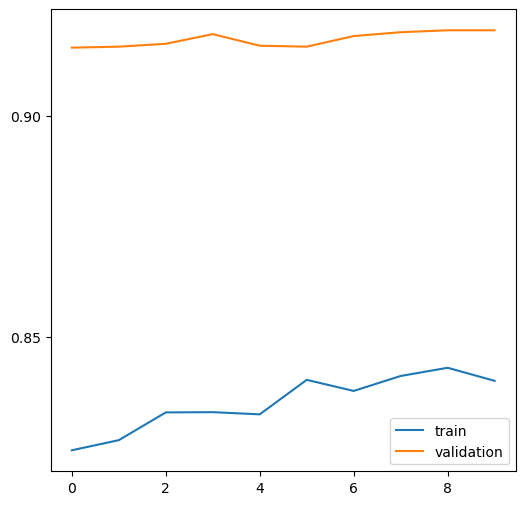

In [107]:
show_history(efficient_fine_history)

(636, 661, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0 [6.2576483e-10 6.6381134e-03 1.0537990e-06 9.9328631e-01 3.1159337e-07
 6.9647385e-06 1.8663126e-08 5.7571512e-08 5.8373855e-05 1.4282525e-11
 2.9113007e-08 2.5286506e-10 9.1924592e-09 5.3364835e-07 1.8922526e-08
 7.9442316e-06 1.8972335e-07]
(291, 343, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
0 [8.1812047e-08 4.7619888e-08 5.4658112e-06 3.4865698e-05 1.7805940e-05
 9.8506236e-01 4.1731024e-08 2.9158969e-08 3.2699983e-09 2.5853686e-05
 8.8483712e-06 4.4325475e-07 1.5648310e-07 8.9490308e-09 1.3127695e-02
 6.7049521e-04 1.0457156e-03]
(94, 119, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
0 [3.2409844e-06 1.4567145e-05 3.3720917e-05 1.3915309e-03 3.0925460e-04
 9.3807709e-01 6.5487768e-07 1.1978230e-07 9.3175635e-07 1.9696896e-04
 6.3551565e-06 2.8930746e-05 1.1590899e-06 1.6791084e-05 3.6442447e-03
 1.8250592e-02 3.8023930e-02]
(569, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0 [1.3828972e-07 9.3258108e-04 3.1695247e-02 8.1304532e-01

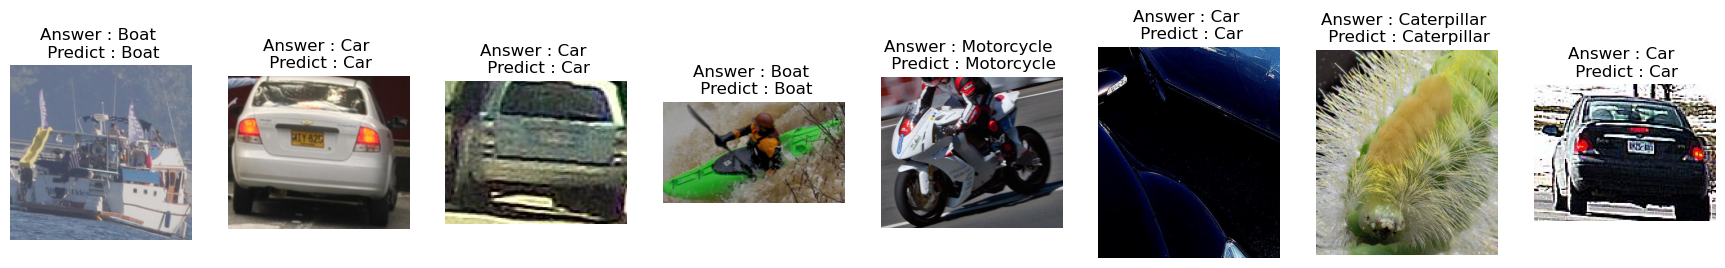

In [108]:
predict_images(test_flow, efficient_fine_model)

시각화

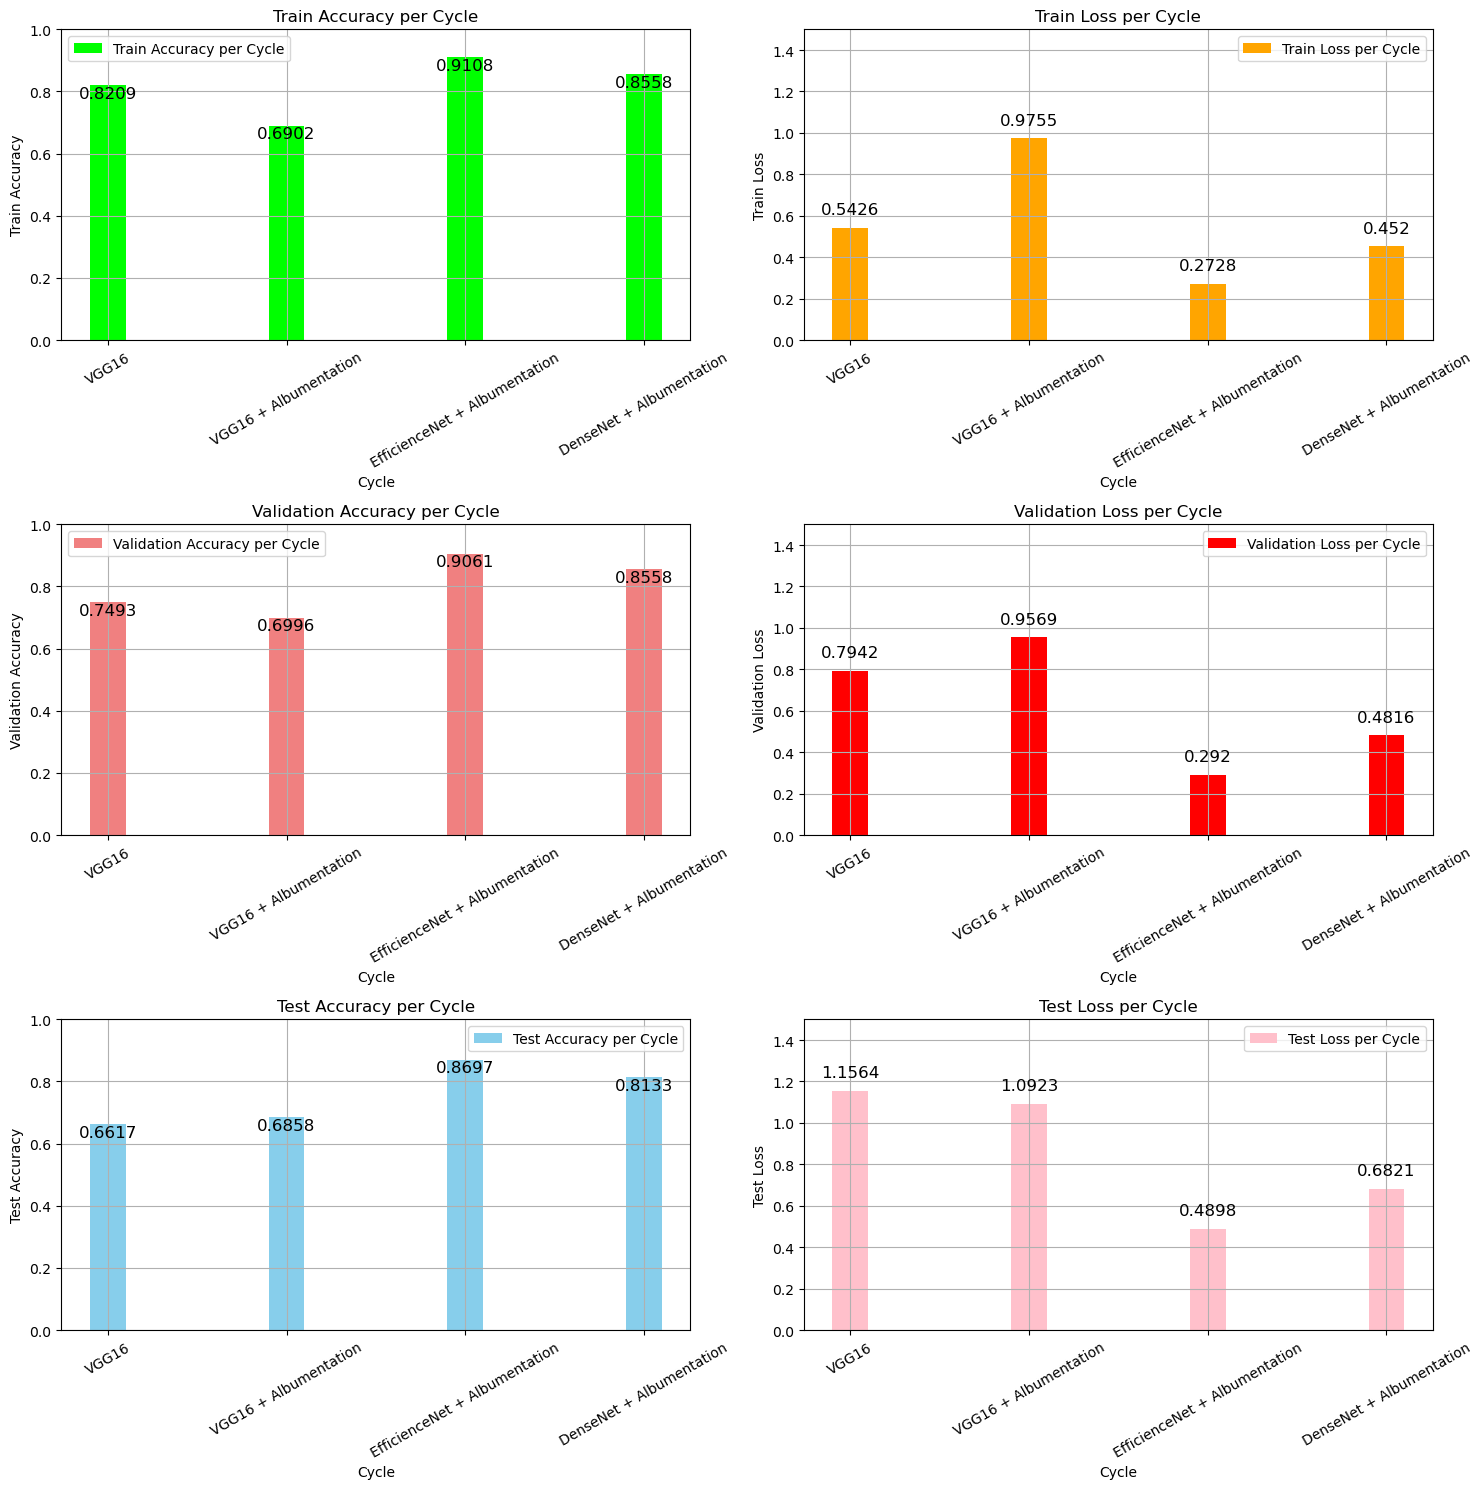

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each cycle
cycle_labels = ['VGG16','VGG16 + Albumentation','EfficienceNet + Albumentation','DenseNet + Albumentation']
acc = [0.8209, 0.6902, 0.9108, 0.8558]
loss = [0.5426, 0.9755, 0.2728, 0.4520]
val_acc = [0.7493, 0.6996, 0.9061, 0.8558]
val_loss = [0.7942, 0.9569, 0.2920, 0.4816]
test_acc = [0.6617, 0.6858, 0.8697, 0.8133]
test_loss = [1.1564, 1.0923, 0.4898, 0.6821]

# Plotting
x = np.arange(len(cycle_labels))
width = 0.2

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

def add_numbers_on_bars(ax, data, offset=0.05):
    for i, v in enumerate(data):
        ax.text(i, v + offset, str(v), ha="center", va="bottom", fontsize=12)

# Training accuracy
axs[0, 0].bar(x, acc, width, label='Train Accuracy per Cycle', color='lime')
axs[0, 0].set_title('Train Accuracy per Cycle')
axs[0, 0].set_xlabel('Cycle')
axs[0, 0].set_ylabel('Train Accuracy')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(cycle_labels, rotation = 30)
axs[0, 0].set_ylim(0.0, 1.0)
axs[0, 0].legend()
axs[0, 0].grid(True)
add_numbers_on_bars(axs[0, 0], acc, offset=-0.05)


# Training loss
axs[0, 1].bar(x, loss, width, label='Train Loss per Cycle', color='orange')
axs[0, 1].set_title('Train Loss per Cycle')
axs[0, 1].set_xlabel('Cycle')
axs[0, 1].set_ylabel('Train Loss')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(cycle_labels, rotation = 30)
axs[0, 1].set_ylim(0.0, 1.5)
axs[0, 1].legend()
axs[0, 1].grid(True)
add_numbers_on_bars(axs[0, 1], loss)

# Validation accuracy
axs[1, 0].bar(x, val_acc, width, label='Validation Accuracy per Cycle', color='lightcoral')
axs[1, 0].set_title('Validation Accuracy per Cycle')
axs[1, 0].set_xlabel('Cycle')
axs[1, 0].set_ylabel('Validation Accuracy')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(cycle_labels, rotation = 30)
axs[1, 0].set_ylim(0.0, 1.0)
axs[1, 0].legend()
axs[1, 0].grid(True)
add_numbers_on_bars(axs[1, 0], val_acc, offset=-0.05)

# Validation loss
axs[1, 1].bar(x, val_loss, width, label='Validation Loss per Cycle', color='red')
axs[1, 1].set_title('Validation Loss per Cycle')
axs[1, 1].set_xlabel('Cycle')
axs[1, 1].set_ylabel('Validation Loss')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(cycle_labels, rotation = 30)
axs[1, 1].set_ylim(0.0, 1.5)
axs[1, 1].legend()
axs[1, 1].grid(True)
add_numbers_on_bars(axs[1, 1], val_loss)

# Test accuracy
axs[2, 0].bar(x, test_acc, width, label='Test Accuracy per Cycle', color='skyblue')
axs[2, 0].set_title('Test Accuracy per Cycle')
axs[2, 0].set_xlabel('Cycle')
axs[2, 0].set_ylabel('Test Accuracy')
axs[2, 0].set_xticks(x)
axs[2, 0].set_xticklabels(cycle_labels, rotation = 30)
axs[2, 0].set_ylim(0.0, 1.0)
axs[2, 0].legend()
axs[2, 0].grid(True)
add_numbers_on_bars(axs[2, 0], test_acc ,offset=-0.05)

# Test loss
axs[2, 1].bar(x, test_loss, width, label='Test Loss per Cycle', color='pink')
axs[2, 1].set_title('Test Loss per Cycle')
axs[2, 1].set_xlabel('Cycle')
axs[2, 1].set_ylabel('Test Loss')
axs[2, 1].set_xticks(x)
axs[2, 1].set_xticklabels(cycle_labels, rotation = 30)
axs[2, 1].set_ylim(0.0, 1.5)
axs[2, 1].legend()
axs[2, 1].grid(True)
add_numbers_on_bars(axs[2, 1], test_loss)

plt.tight_layout()
plt.show()


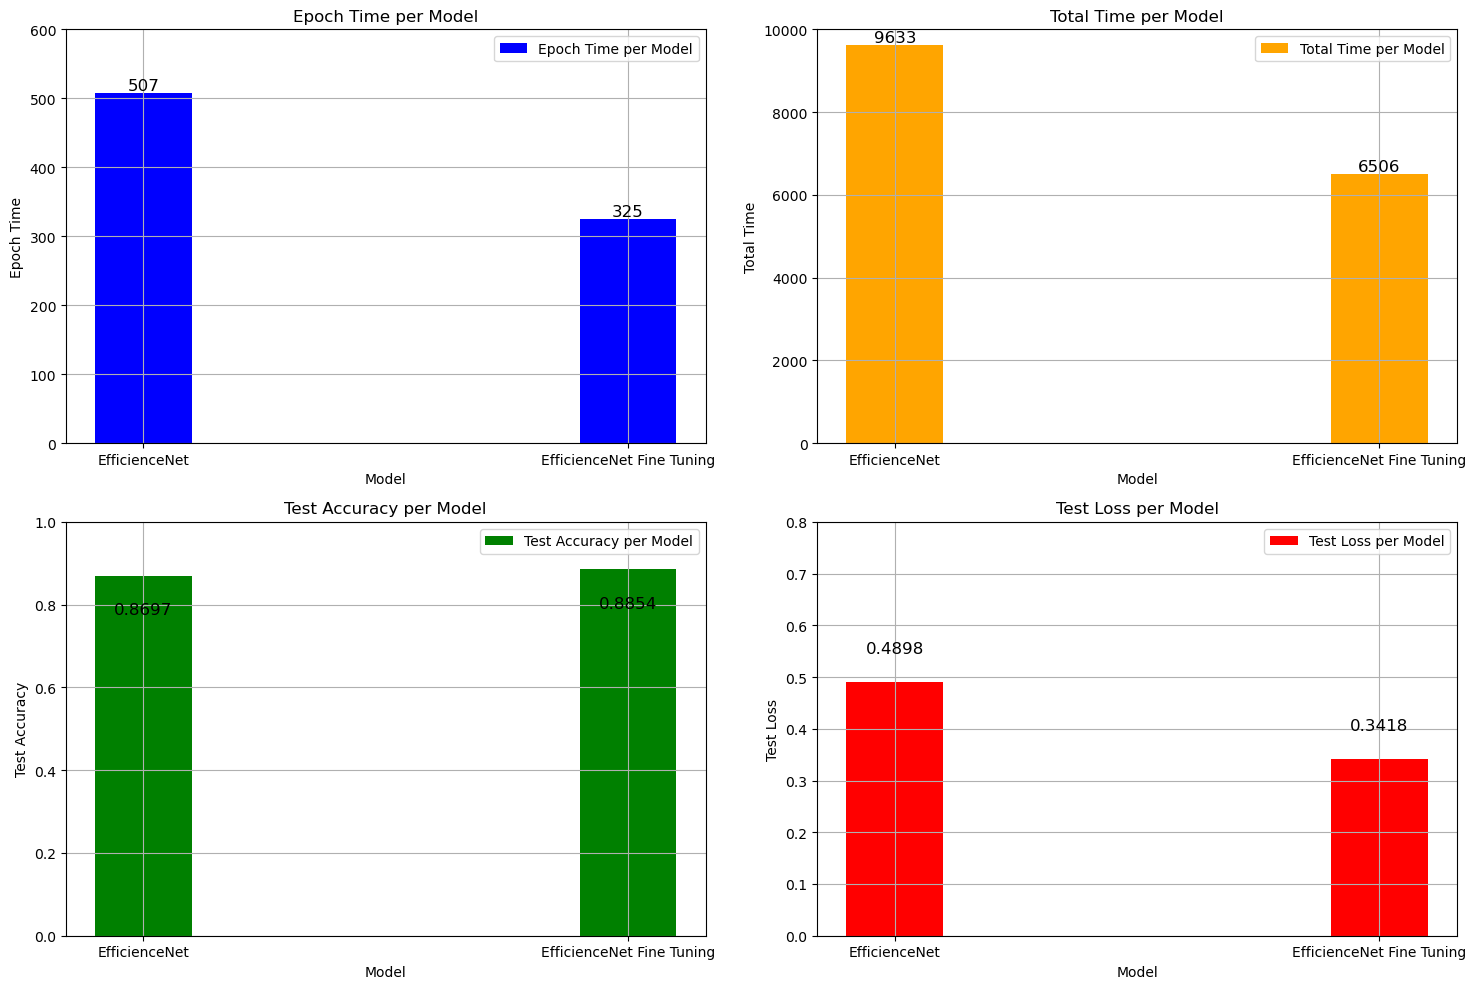

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each cycle
cycle_labels = ['EfficienceNet','EfficienceNet Fine Tuning']
epoch_time = [507, 325]
total_time = [9633, 6506]
test_acc = [0.8697, 0.8854]
test_loss = [0.4898, 0.3418]

# Plotting
x = np.arange(len(cycle_labels))
width = 0.2

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

def add_numbers_on_bars(ax, data, offset=0.05):
    for i, v in enumerate(data):
        ax.text(i, v + offset, str(v), ha="center", va="bottom", fontsize=12)


axs[0, 0].bar(x, epoch_time, width, label='Epoch Time per Model', color='blue')
axs[0, 0].set_title('Epoch Time per Model')
axs[0, 0].set_xlabel('Model')
axs[0, 0].set_ylabel('Epoch Time')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(cycle_labels, rotation = 0)
axs[0, 0].set_ylim(0.0, 600.0)
axs[0, 0].legend()
axs[0, 0].grid(True)
add_numbers_on_bars(axs[0, 0], epoch_time)


axs[0, 1].bar(x, total_time, width, label='Total Time per Model', color='orange')
axs[0, 1].set_title('Total Time per Model')
axs[0, 1].set_xlabel('Model')
axs[0, 1].set_ylabel('Total Time')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(cycle_labels, rotation = 0)
axs[0, 1].set_ylim(0.0, 10000.0)
axs[0, 1].legend()
axs[0, 1].grid(True)
add_numbers_on_bars(axs[0, 1], total_time, offset=-0.1)

axs[1, 0].bar(x, test_acc, width, label='Test Accuracy per Model', color='green')
axs[1, 0].set_title('Test Accuracy per Model')
axs[1, 0].set_xlabel('Model')
axs[1, 0].set_ylabel('Test Accuracy')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(cycle_labels, rotation = 0)
axs[1, 0].set_ylim(0.0, 1.0)
axs[1, 0].legend()
axs[1, 0].grid(True)
add_numbers_on_bars(axs[1, 0], test_acc, offset=-0.1)


# Validation loss
axs[1, 1].bar(x, test_loss, width, label='Test Loss per Model', color='red')
axs[1, 1].set_title('Test Loss per Model')
axs[1, 1].set_xlabel('Model')
axs[1, 1].set_ylabel('Test Loss')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(cycle_labels, rotation = 0)
axs[1, 1].set_ylim(0.0, 0.8)
axs[1, 1].legend()
axs[1, 1].grid(True)
add_numbers_on_bars(axs[1, 1], test_loss)



plt.tight_layout()
plt.show()
